Problem Statement:
The objective is to predict students' GPA (Grade Point Average) based on various academic and extrcurricular activities using a Linear Regression model. The model aims to identify how factors like study habits, attendance, and support systems influence student performance.

Data Ingestion

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student_performance_data _.csv')

Data Exploration

In [3]:
# Display the first 5 rows of the dataset
print(data.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [4]:
# Display the shape of the dataset
print(data.shape)

(2392, 15)


In [5]:
# Display the columns of the dataset
print(data.columns)

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


In [6]:
# Display summary information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None


In [7]:
# Check for missing values
print(data.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [8]:
#Display statistical summary of the dataset
print(data.describe())

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

In [9]:
# Number of unique values
print(data.nunique())

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64


Features Overview

1. StudentID
Type: int64
Description: Unique identifier for each student.
Usefulness: Acts as an identifier; not useful for predictive modeling.
2. Age
Type: int64
Description: Age of the student (ranges from 15 to 18).
Potential Impact: Could influence GPA, as maturity might correlate with performance.
3. Gender
Type: int64 (Encoded: 0 = Female, 1 = Male)
Description: Indicates the gender of the student.
Potential Impact: Useful for demographic analysis; may or may not affect GPA.
4. Ethnicity
Type: int64 (Encoded categories)
Description: Coded representation of the student’s ethnicity.
Potential Impact: Could be used to study performance across different groups, but handle with care to avoid biases.
5. ParentalEducation
Type: int64 (Encoded from 0 to 4)
Description: Educational level of the parents (higher values likely indicate higher education levels).
Potential Impact: Parental education often correlates with student academic success.
6. StudyTimeWeekly
Type: float64
Description: Total hours spent studying per week.
Potential Impact: Strong potential correlation with GPA; key predictor.
7. Absences
Type: int64
Description: Total number of classes missed.
Potential Impact: More absences could negatively affect GPA.
8. Tutoring
Type: int64 (0 = No, 1 = Yes)
Description: Indicates if the student receives tutoring.
Potential Impact: May have a positive effect on GPA depending on tutoring quality.
9. ParentalSupport
Type: int64 (Scale 0-4)
Description: Level of parental support the student receives (higher = more support).
Potential Impact: Higher support might contribute to better academic performance.
10. Extracurricular
Type: int64 (0 = No, 1 = Yes)
Description: Participation in extracurricular activities.
Potential Impact: Could either positively influence (through skill development) or negatively (if time conflicts with studies).
11. Sports
Type: int64 (0 = No, 1 = Yes)
Description: Indicates participation in sports.
Potential Impact: Similar to extracurricular activities—can foster discipline or create time management challenges.
12. Music
Type: int64 (0 = No, 1 = Yes)
Description: Participation in music-related activities.
Potential Impact: Might enhance cognitive abilities or take time away from academics.
13. Volunteering
Type: int64 (0 = No, 1 = Yes)
Description: Indicates involvement in volunteer work.
Potential Impact: Could show positive personality traits but may have minimal direct effect on GPA.
14. GPA
Type: float64 (Range: 0.0 to 4.0)
Description: Grade Point Average, a key measure of academic performance.
Target Variable: This is the variable we want to predict.
15. GradeClass
Type: float64 (Encoded categories)
Description: Categorized grade class (e.g., 1 = Freshman, 4 = Senior, depending on the encoding).


Data Preprocessing 

In [10]:
#Drop this columns because we know from the description that columns does not consist any useful information. 
data.drop(columns='StudentID', inplace=True)



# The dataset has usability index 10 from Kaggle and no further preprocessing is needed (i.e. we move to EDA)

EDA

Data Visualization 

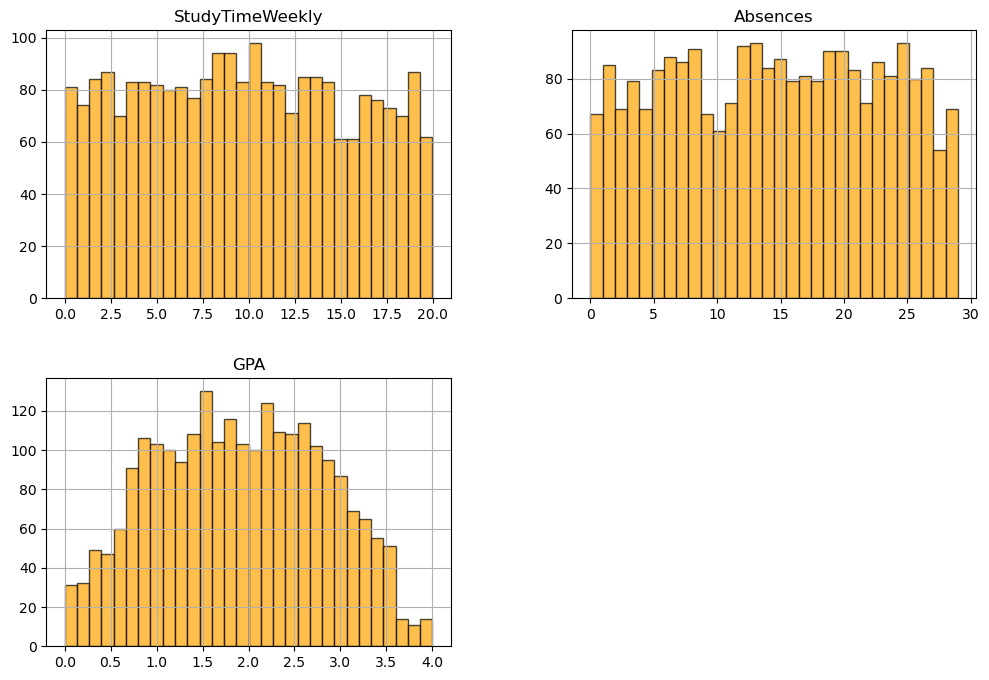

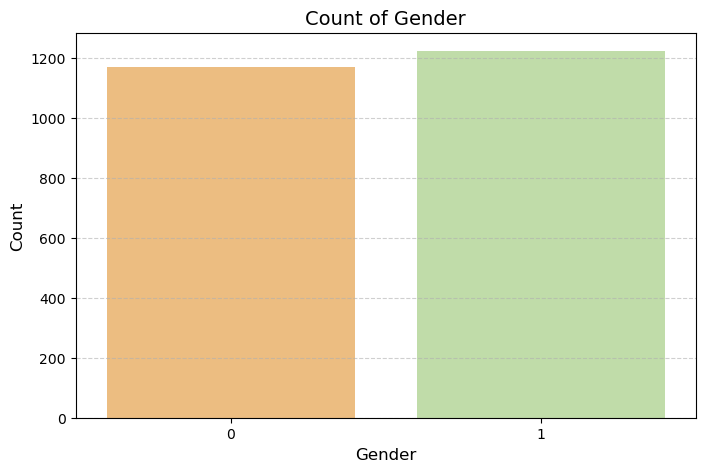

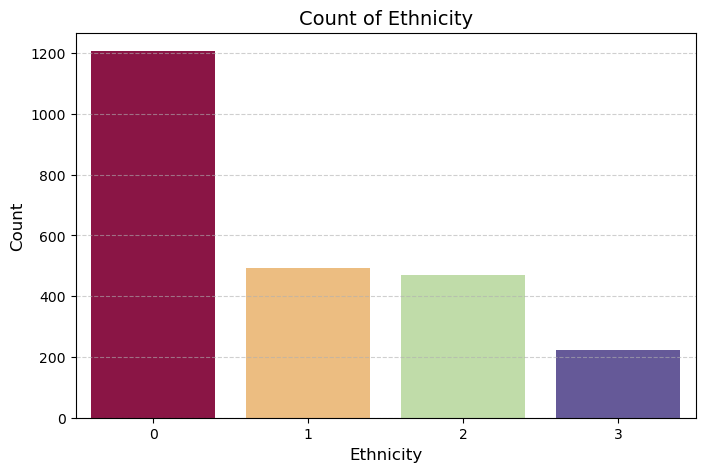

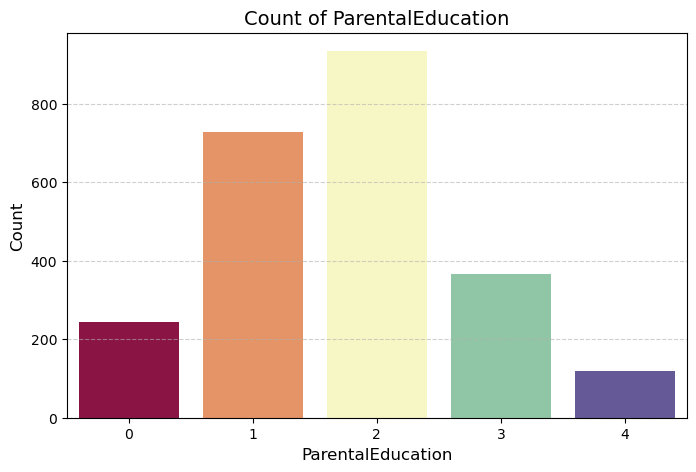

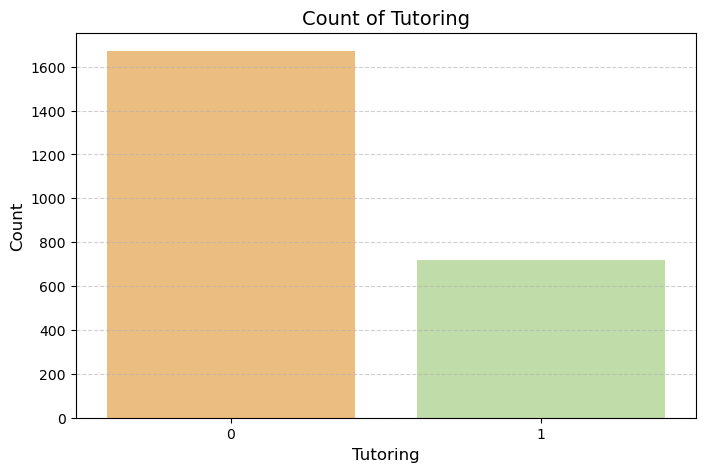

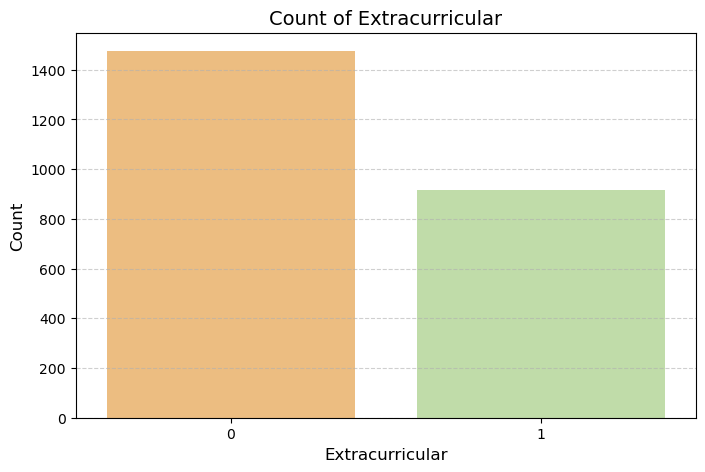

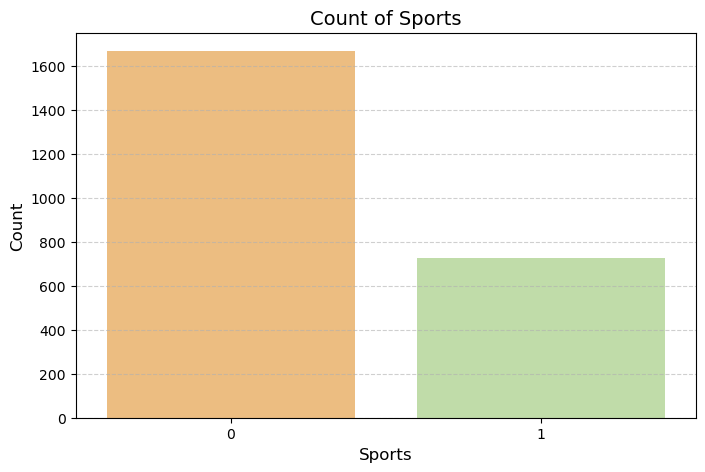

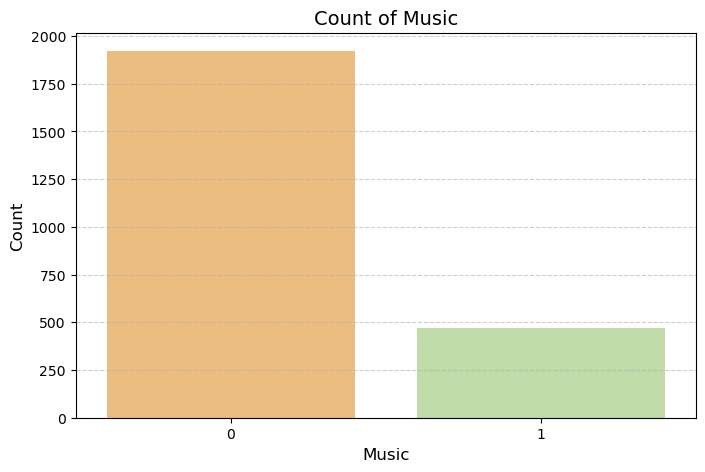

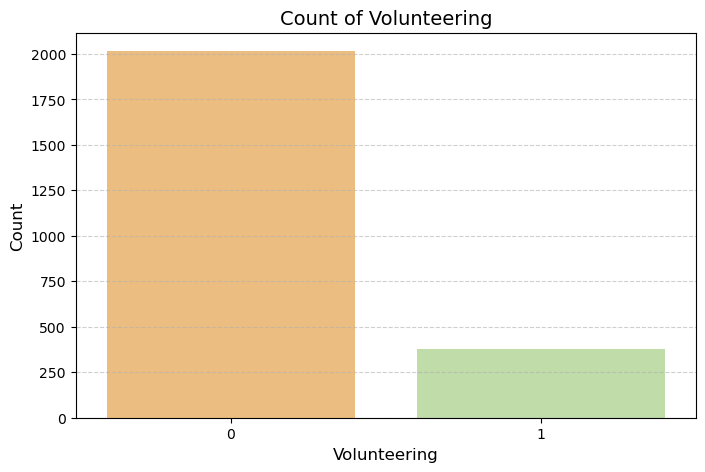

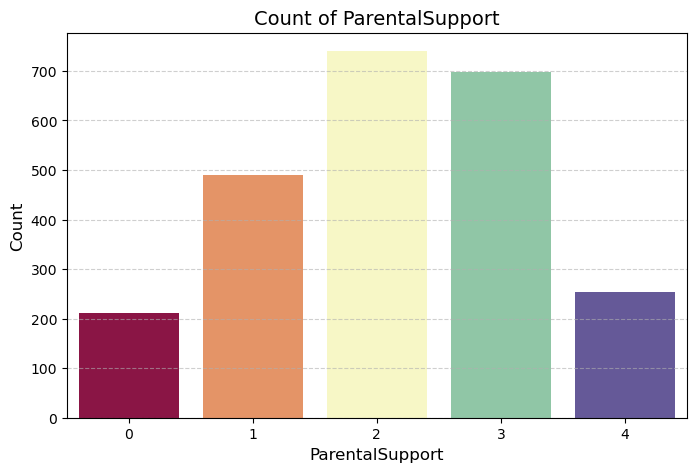

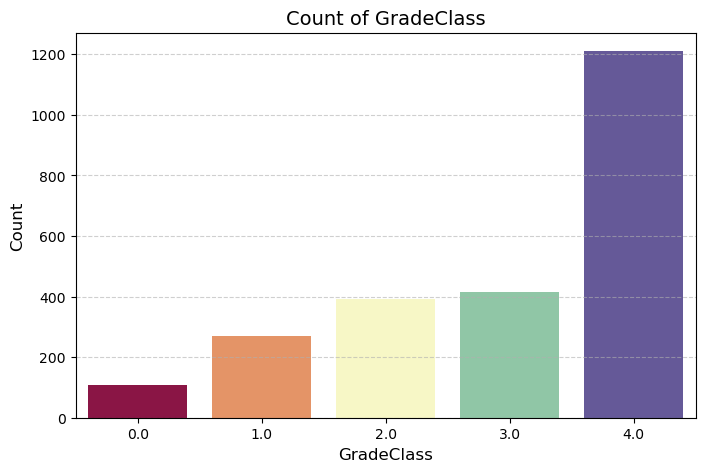

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate continuous and categorical variables
continuous_vars = ['GPA', 'StudyTimeWeekly', 'Absences']
categorical_vars = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
                    'Extracurricular', 'Sports', 'Music', 'Volunteering', 'ParentalSupport', 'GradeClass']

data[['StudyTimeWeekly', 'Absences', 'GPA']].hist(figsize=(12, 8), bins=30, color='orange', edgecolor='black', alpha=0.7)



# Plotting categorical variables with count plots
for col in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, palette='Spectral', legend=False, hue=col)
    plt.title(f'Count of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

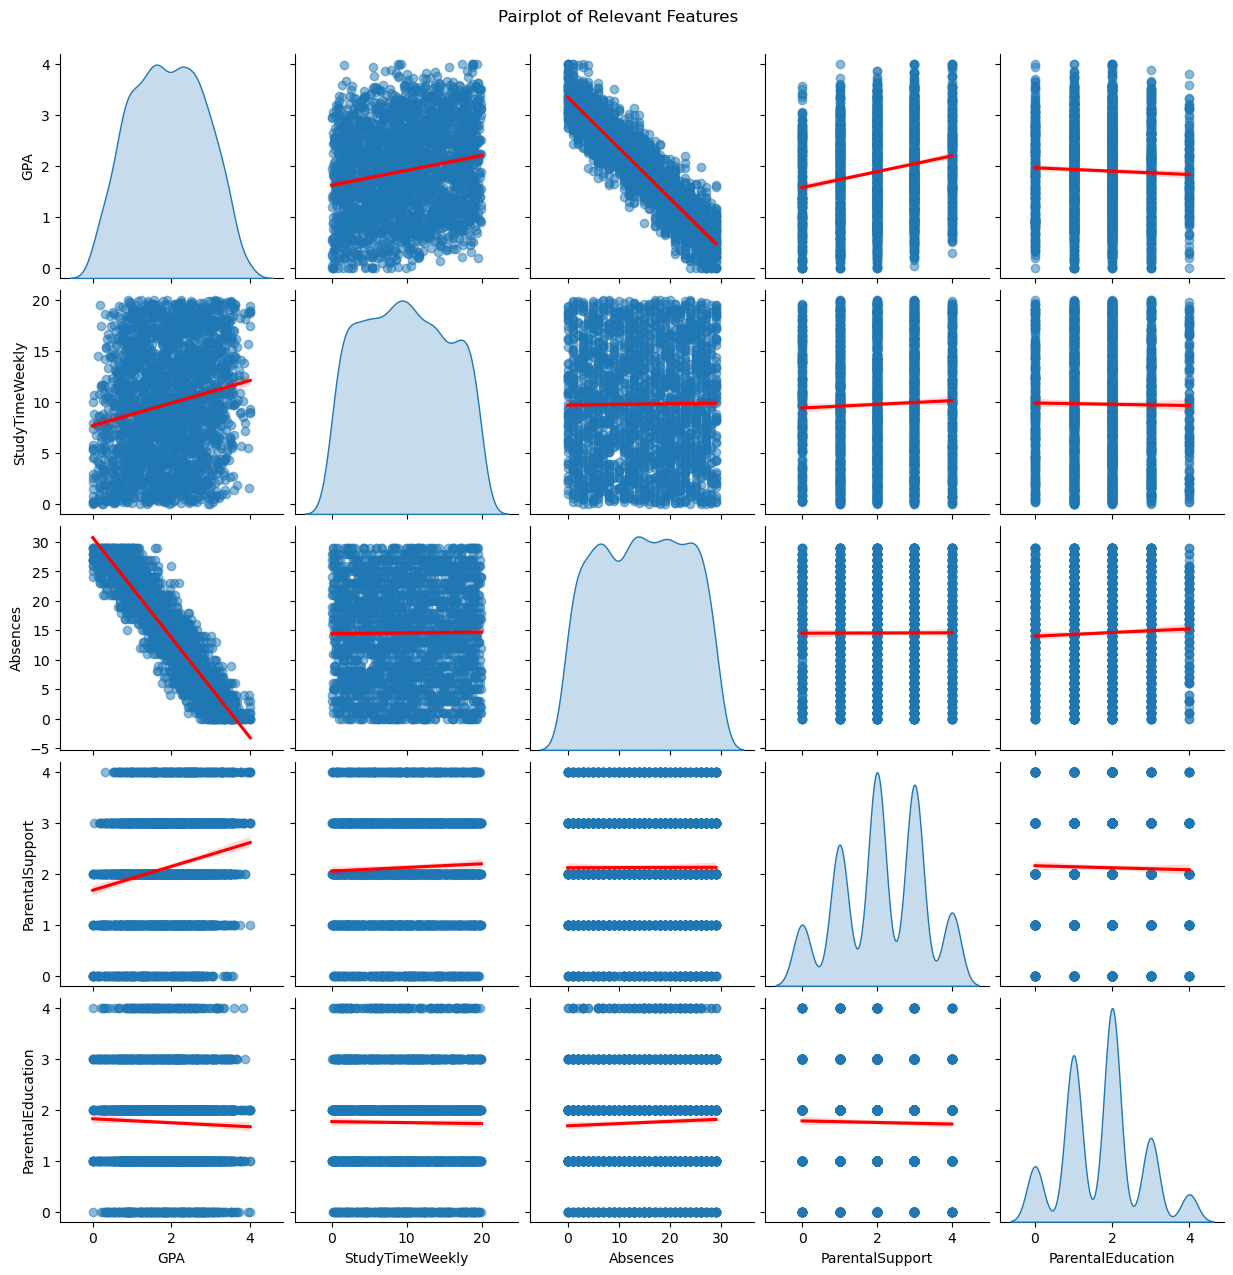

In [12]:

# Pairplot for relevant linear relationships
sns.pairplot(data, vars=['GPA', 'StudyTimeWeekly', 'Absences', 'ParentalSupport', 'ParentalEducation'], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.suptitle('Pairplot of Relevant Features', y=1.02)
plt.show()



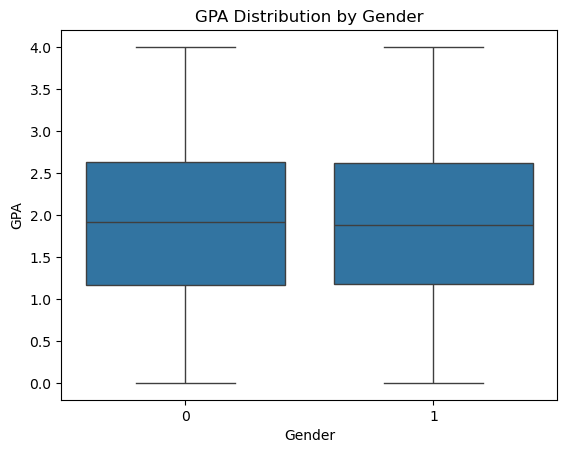

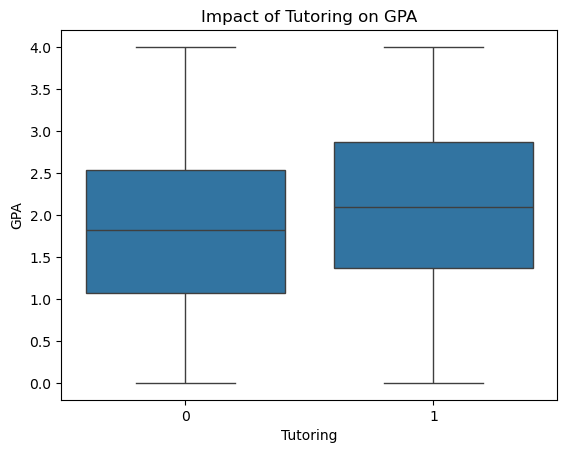

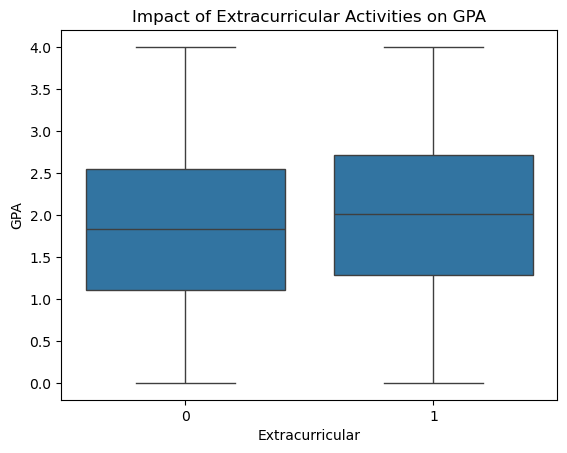

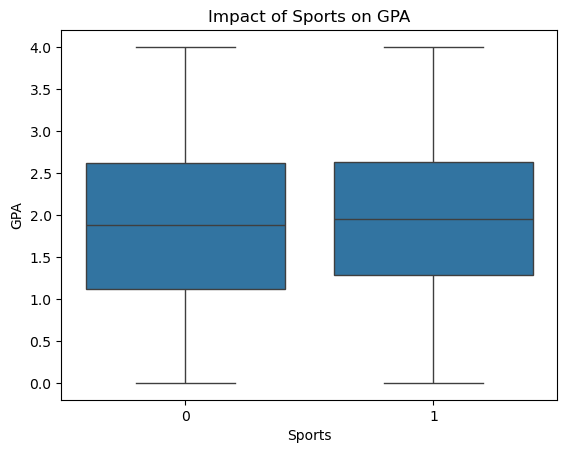

In [13]:
sns.boxplot(data, x='Gender', y='GPA')
plt.title('GPA Distribution by Gender')
plt.show()

sns.boxplot(data, x='Tutoring', y='GPA')
plt.title('Impact of Tutoring on GPA')
plt.show()

sns.boxplot(data, x='Extracurricular', y='GPA')
plt.title('Impact of Extracurricular Activities on GPA')
plt.show()

sns.boxplot(data, x='Sports', y='GPA')
plt.title('Impact of Sports on GPA')
plt.show()




Identifying correlations and features importance.

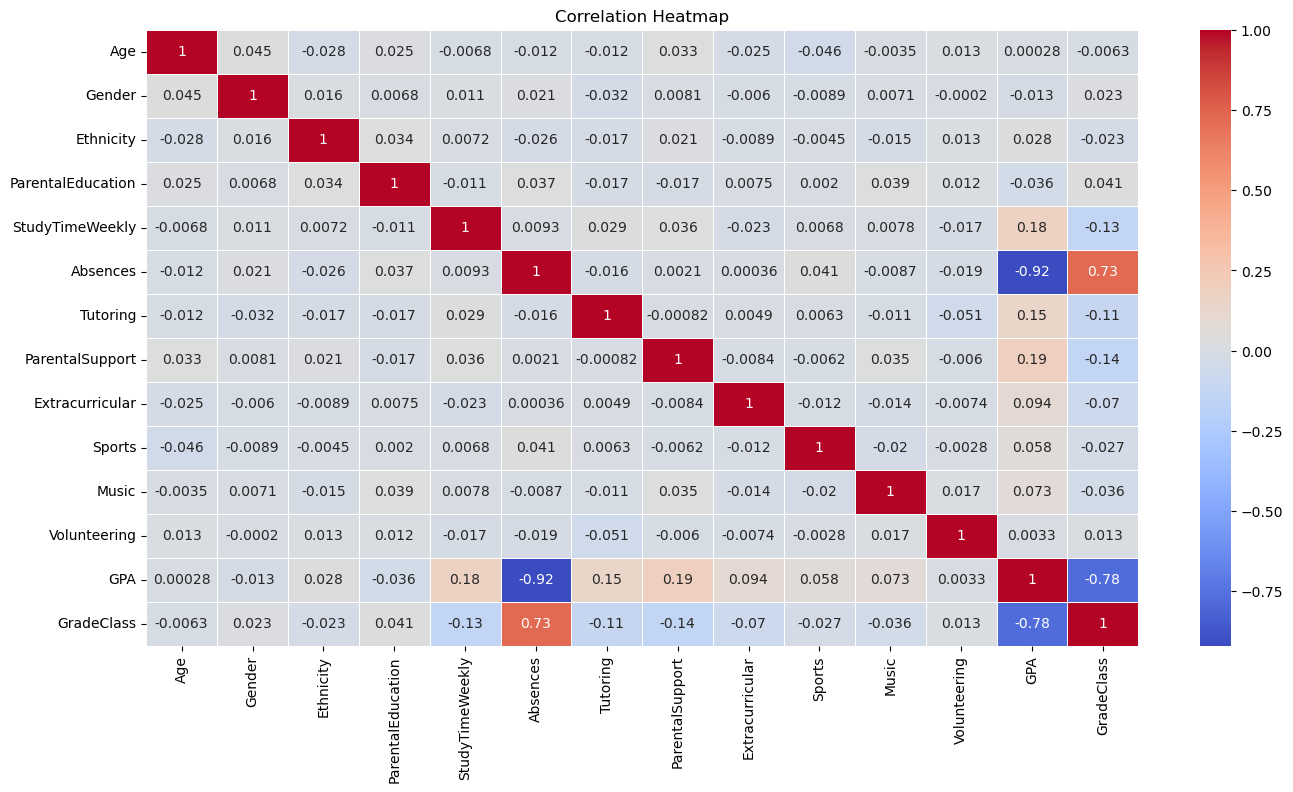

In [14]:
plt.figure(figsize=(16,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Linear Models


                 Coefficients
StudyTimeWeekly      0.029589
Absences            -0.099409
Tutoring             0.259659
Extracurricular      0.186841
ParentalSupport      0.149498
Mean Squared Error: 0.05065310760828915
R2 Score: 0.9387457856313737


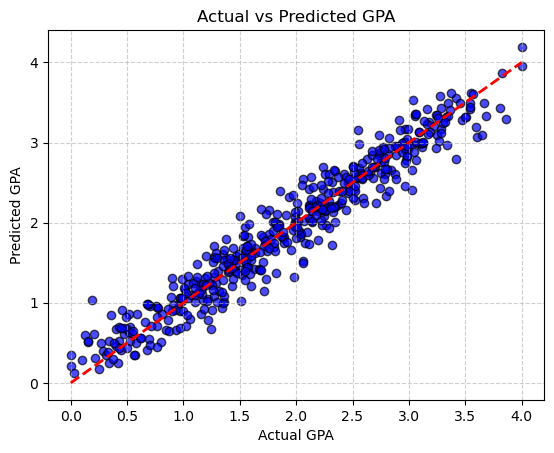

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define the features and target variable
X = data[['StudyTimeWeekly', 'Absences', 'Tutoring', 'Extracurricular', 'ParentalSupport']]
y = data['GPA']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients and intercept

cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Plotting Actual vs Predicted GPA
# plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()




K-Fold Cross Validation

In [16]:
from sklearn.model_selection import KFold, cross_val_score

# Define the KFold strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with the custom KFold
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f'R2 Scores for each fold: {cv_scores}')
print(f'Mean R2 Score from Cross-Validation: {cv_scores.mean()}')


R2 Scores for each fold: [0.93874579 0.94195166 0.9359339  0.94099185 0.94398898]
Mean R2 Score from Cross-Validation: 0.9403224340378011
